In [604]:
import matplotlib.pyplot as plt
import ase
from ase import io
from ase.visualize import view
from glob import glob
from pathlib import Path
import json
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import ase
from ase import io
from ase.visualize import view

In [74]:
#No xyz output? --> take from orca. #json

def sort(list):
    return sorted(list)


"""
Generate combined xyz file for chosen method output 
"""

method = "pbe0"


with open("/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/indexes") as w:
    indexes1 = w.read()
indexes2 = indexes1.split("\n")
#print(indexes2)
indexes3 = indexes2[:-1] #removes empty string which is at the end for some reason
#print(f"indexes3: {indexes3}")
indexes35 = []
for i in range(len(indexes3)): #convert list of strings to list of integers for sorting 
    indexes35.append(int(indexes3[i]))
#print(f"indexes35: {indexes35}")
#print(len(indexes35))
indexes4 = sort(indexes35)
#print(f"indexes4: {indexes4}")
#print(len(indexes4))


with open(f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/{method}_output.xyz", "w") as t:
    
    for index in indexes4:
        # print(index)
        # print(type(index))
        i = int(index)
        opath = glob(f"/cluster/home/schmidtn/master/wahlprak/orca/pbe0/
        dft-mp2-data/orca_dih_mp2_rimp2/orca/dih2dscan-{i}.inp.xyz/{method}/def2svp/*.json")[0]
        with open(opath) as f:
            data_dict = json.load(f)
        energy = data_dict["Geometry_1"]["Calculation_Info"]["TOTALENERGY"] #is in Hartree
        xyz = data_dict["Geometry_1"]["Geometry"]["Coordinates"]["Cartesians"]
        t.write("42\n") #number of atoms in ALA
        t.write(f"Output from {opath}, Energy (Hartree) = {energy}\n")
        for c in range(len(xyz)):
            for c2 in range(len(xyz[c])):
                t.write(f"{str(xyz[c][c2])}     ")
            t.write("\n")

print("done")




done


In [519]:
def recover_Cartesians_from_malformed_json(output_path, natoms=42):
    """Unofficial implementation of the 'find out' function
    ('fuck around' function not yet public)"""

    with open(output_path) as f:
        output_str = f.read()

    no_ws = output_str.replace(" ", "")
    no_ws = no_ws.replace("\n", "")
    no_ws_reversed = no_ws[::-1]

    if not "snaisetraC" in no_ws_reversed:
        return None

    darg_idx = no_ws_reversed.index("snaisetraC")
    darg_hit_prefix = no_ws_reversed[0:darg_idx:1][::-1]
    close_bracket_idx = darg_hit_prefix.index("]]")

    txt_array = darg_hit_prefix[2:close_bracket_idx]
    txt_array = txt_array.replace("[", " ")
    txt_array = txt_array.replace("]", " ")

    from io import StringIO

    s = StringIO(txt_array)
    data = np.genfromtxt(s, delimiter=",")
    return data


def recover_NRG_from_malformed_json(output_path, natoms=42):
    """Unofficial implementation of the 'find out' function
    ('fuck around' function not yet public)"""

    with open(output_path) as f:
        output_str = f.read()

    no_ws = output_str.replace(" ", "")
    no_ws = no_ws.replace("\n", "")
    no_ws_reversed = no_ws[::-1]

    if not "NELANIF" in no_ws_reversed:
        return None

    darg_idx = no_ws_reversed.index("NELANIF")
    darg_hit_prefix = no_ws_reversed[0:darg_idx:1][::-1]
    close_bracket_idx = darg_hit_prefix.index("}]") #################################################

    txt_array = darg_hit_prefix[2:close_bracket_idx]
    txt_array = txt_array.replace("[", " ")
    txt_array = txt_array.replace("]", " ")

    return float(txt_array)

In [520]:
#No xyz output? --> take from orca. #json
# """
# Generate combined xyz file for chosen method output 
# """

method = "pbe0"
fn = "dih2dscan-0.inp.xyz.bf418b92-e492-11ef-8425-5379090b8daf.property.json"
file_path = Path("/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/orca/dih2dscan-0.inp.xyz/pbe0/def2svp") / fn
recover_NRG_from_malformed_json(file_path)


-934.5847391851311

In [521]:
method="pbe0"

with open(f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/new_{method}_output.xyz", "w") as t:
    
    for index in indexes4:
        i = int(index)
        file_path = Path(f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/orca/dih2dscan-{i}.inp.xyz/pbe0/def2svp") 
        fn = list(file_path.glob("*.property.json"))[0]
        #print(i, fn)
        opath = str(fn)
        
        # fn = f"dih2dscan-{i}.inp.xyz.bf418b92-e492-11ef-8425-5379090b8daf.property.json"
        energy = recover_NRG_from_malformed_json(fn)
        xyzs = recover_Cartesians_from_malformed_json(fn)
        #print(xyzs)
        #xyzs = np.zeros((42,3))
        t.write("42\n") #number of atoms in ALA
        t.write(f"Output from {opath}, Energy (Hartree) = {energy}\n")
        for c in range(len(xyz)):
            for c2 in range(len(xyz[c])):
                t.write(f"{str(xyz[c][c2])}     ")
            t.write("\n")

print("done")

done


In [321]:
l = [1,2,3,4]
l[:]

[1, 2, 3, 4]

In [322]:
atoms[0]

Atoms(symbols='NH3CHC2H3ONHCHC2H2COHC2H6NHCHC2H3O2', pbc=False)

In [323]:
def filter_non_digits(string: str) -> float:
    if type(string) == str:
        result = ''
        for char in string:
            if char in '1234567890.-':
                result += char
        return float(result )
    else:
        return string

In [589]:
rimp2_path = "/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/rimp2_output.xyz"
mp2_path = "/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/mp2_output.xyz"
#pbe0_path = "/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/pbe0_output.xyz"
pbe0_path = "/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/pbe0_index_output.xyz"

dE_key = "$\Delta E$"

def get_df(path):
    atoms = ase.io.read(path, index=":")
    energies = [filter_non_digits(_.info["(Hartree)"]) for _ in atoms]
    phis = [_.get_dihedral(31, 17, 14, 12, mic=False) for _ in atoms]
    psis = [_.get_dihedral(17, 14, 12, 7, mic=False) for _ in atoms] 
    keys = [[_[:-1].split("/")[9] for _ in list(_.info.keys()) if "json" in _].pop() for _ in atoms]
    _ = pl.DataFrame({"key": keys, "E": energies, "phi": phis, "psi": psis})
    return _.with_columns((pl.col("E") - pl.col("E").min()).alias(dE_key))



def get_df_pbe0(path):
    atoms = ase.io.read(path, index=":")
    energies = [filter_non_digits(_.info["E"]) for _ in atoms]
    #print(energies)
    phis = [_.get_dihedral(31, 17, 14, 12, mic=False) for _ in atoms]
    psis = [_.get_dihedral(17, 14, 12, 7, mic=False) for _ in atoms] 
    keys = [[_[:-1].split(" ")[0] for _ in list(_.info.keys()) if "inp" in _].pop() for _ in atoms]
    _ = pl.DataFrame({"key": keys, "E": energies, "phi": phis, "psi": psis})
    return _.with_columns((pl.col("E") - pl.col("E").min()).alias(dE_key))
    

In [590]:
df_mp2 = get_df(mp2_path)

In [591]:
df_rimp2 = get_df(rimp2_path)
# df_rimp2

In [948]:
df_pbe0 = get_df_pbe0(pbe0_path)
df_pbe0

key,E,phi,psi,$\Delta E$
str,f64,f64,f64,f64
"""dih2dscan-0.inp.xyz.bf418b92-e…",-934.584739,169.225093,197.912636,0.000226
"""dih2dscan-1.inp.xyz.c009f548-e…",-934.584965,164.560364,203.420377,0.0
"""dih2dscan-2.inp.xyz.c0f3ebb3-e…",-934.584836,169.225098,203.677151,0.000129
"""dih2dscan-3.inp.xyz.c1d3b806-e…",-934.584412,174.103109,198.395465,0.000554
"""dih2dscan-4.inp.xyz.c1d3b875-e…",-934.583869,178.794462,198.174301,0.001096
…,…,…,…,…
"""dih2dscan-3595.inp.xyz.c1d3b7d…",-934.583553,155.228803,188.512672,0.001412
"""dih2dscan-3596.inp.xyz.c1d3b7d…",-934.583972,160.116594,188.714882,0.000993
"""dih2dscan-3597.inp.xyz.c1d3b7d…",-934.584103,155.227463,193.612978,0.000862


In [949]:
df_mp2

key,E,phi,psi,$\Delta E$
str,f64,f64,f64,f64
"""dih2dscan-0.inp.xyz""",-932.839098,169.225097,197.912638,0.000655
"""dih2dscan-1.inp.xyz""",-932.839753,164.560371,203.420379,0.0
"""dih2dscan-2.inp.xyz""",-932.839434,169.225093,203.677148,0.000319
"""dih2dscan-3.inp.xyz""",-932.838911,174.103115,198.395466,0.000843
"""dih2dscan-4.inp.xyz""",-932.838075,178.794466,198.174302,0.001678
…,…,…,…,…
"""dih2dscan-3595.inp.xyz""",-932.838228,155.228796,188.512669,0.001525
"""dih2dscan-3596.inp.xyz""",-932.838413,160.116597,188.714882,0.00134
"""dih2dscan-3597.inp.xyz""",-932.838947,155.22747,193.61298,0.000806


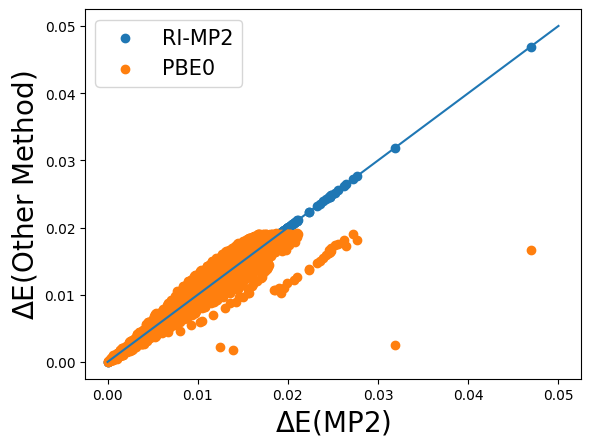

In [1026]:
plt.scatter(df_mp2[dE_key], df_rimp2[dE_key], label = "RI-MP2")
plt.scatter(df_mp2[dE_key], df_pbe0[dE_key], label = "PBE0")
plt.plot([0, 0.05], [0, 0.05])
ax = plt.gca()
ax.set_xlabel("$\Delta$E(MP2)", fontsize = 20)
ax.set_ylabel("$\Delta$E(Other Method)", fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig("RIMP2AndPBE0vsMP2.png")

In [259]:
E_key = "E"

def rmsd(a, b):
    return (np.mean((a.to_numpy() - b.to_numpy()) ** 2)) ** 0.5

rmsd(df_mp2[dE_key], df_rimp2[dE_key])* 627, rmsd(df_mp2[dE_key], df_pbe0[dE_key])* 627

(np.float64(0.0050290175959800745), np.float64(1.332922530386071))

In [906]:
import math
def truncate(number, digits) -> float:
    # Improve accuracy with floating point operations, to avoid truncate(16.4, 2) = 16.39 or truncate(-1.13, 2) = -1.12
    nbDecimals = len(str(number).split('.')[1]) 
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepperrmsd(df_mp2[ E_key], df_rimp2[ E_key])* 627, rmsd(df_mp2[E_key], df_pbe0[E_key])* 627

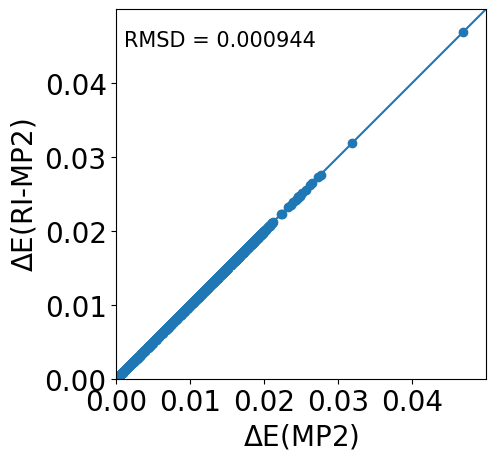

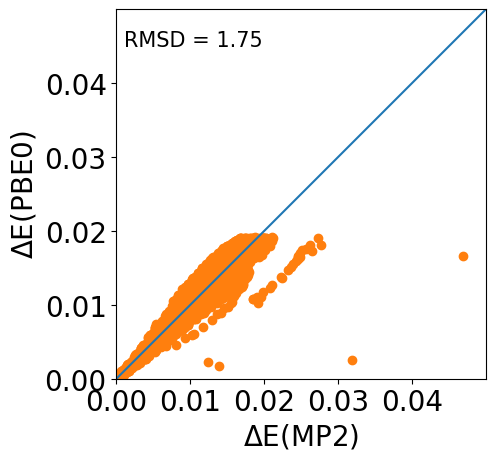

In [1028]:


rmsd1 = rmsd(df_mp2["E"], df_rimp2["E"])
rmsd2 = rmsd(df_mp2["E"], df_pbe0["E"])
# plt.scatter(df_mp2["E"], df_rimp2["E"])
#plt.scatter(df_mp2["E"], df_rimp2["E"])
plt.scatter(df_mp2[dE_key], df_rimp2[dE_key])
ax=plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)

ax = plt.gca()
ax.set_xlabel("$\Delta$E(MP2)", fontsize=20)
ax.set_ylabel("$\Delta$E(RI-MP2)", fontsize=20)
# plt.text(0.02, 0, f"RMSD = {rmsd1}")
plt.text(0.001, 0.045, f"RMSD = 0.000944", fontsize=15)
plt.xticks(np.arange(0, 0.05, 0.01), fontsize=20)
plt.yticks(np.arange(0, 0.05, 0.01), fontsize=20)
plt.xlim(0, 0.05)
plt.ylim(0, 0.05)
ax.set_aspect("equal")
plt.savefig("E(RIMP2)vsE(MP2).png", bbox_inches="tight")
plt.show()

plt.scatter(df_mp2[dE_key], df_pbe0[dE_key], c="tab:orange")
ax=plt.gca()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)


ax.set_xlabel("$\Delta$E(MP2)", fontsize=20)
ax.set_ylabel("$\Delta$E(PBE0)", fontsize=20)
plt.text(0.001, 0.045, f"RMSD = 1.75", fontsize=15)
plt.xticks(np.arange(0, 0.05, 0.01), fontsize=20)
plt.yticks(np.arange(0, 0.05, 0.01), fontsize=20)
plt.xlim(0, 0.05)
plt.ylim(0, 0.05)
ax.set_aspect("equal")
plt.savefig("E(PBE0)vsE(MP2).png", bbox_inches="tight")
plt.show()

In [979]:
df_pbe0

key,E,phi,psi,$\Delta E$
str,f64,f64,f64,f64
"""dih2dscan-0.inp.xyz.bf418b92-e…",-934.584739,169.225093,197.912636,0.000226
"""dih2dscan-1.inp.xyz.c009f548-e…",-934.584965,164.560364,203.420377,0.0
"""dih2dscan-2.inp.xyz.c0f3ebb3-e…",-934.584836,169.225098,203.677151,0.000129
"""dih2dscan-3.inp.xyz.c1d3b806-e…",-934.584412,174.103109,198.395465,0.000554
"""dih2dscan-4.inp.xyz.c1d3b875-e…",-934.583869,178.794462,198.174301,0.001096
…,…,…,…,…
"""dih2dscan-3595.inp.xyz.c1d3b7d…",-934.583553,155.228803,188.512672,0.001412
"""dih2dscan-3596.inp.xyz.c1d3b7d…",-934.583972,160.116594,188.714882,0.000993
"""dih2dscan-3597.inp.xyz.c1d3b7d…",-934.584103,155.227463,193.612978,0.000862


In [896]:
# rmsd(df_mp2["E"].to_numpy(), df_rimp2["E"].to_numpy())
c = rmsd(df_mp2["E"], df_rimp2["E"])
print(f"RMSD(MP2/RI-MP2) = {c}")

RMSD(MP2/RI-MP2) = 0.0009437959255438386


In [921]:
df_pbe0 = get_df_pbe0(pbe0_path)
df_pbe0 = df_pbe0.with_columns(df_mp2.get_column("E").alias("MP2Comp"))
#df_pbe0 = df_pbe0.with_columns(df_mp2.get_column(dE_key).alias("MP2Comp"))
df_pbe0 = df_pbe0.with_columns((abs(pl.col("E") - pl.col("MP2Comp")) ).alias("MP2Diff")) 
#df_pbe0 = df_pbe0.with_columns((abs(pl.col(dE_key) - pl.col("MP2Comp")) ).alias("MP2Diff"))
df_pbe0 = df_pbe0.sort(pl.col("MP2Diff"))
df_pbe0

key,E,phi,psi,$\Delta E$,MP2Comp,MP2Diff
str,f64,f64,f64,f64,f64,f64
"""dih2dscan-1776.inp.xyz.c009f44…",-934.569473,124.804306,316.501473,0.015492,-932.827696,1.741778
"""dih2dscan-1784.inp.xyz.c009f45…",-934.568465,124.037905,328.716811,0.016501,-932.826651,1.741814
"""dih2dscan-1779.inp.xyz.c009f45…",-934.569986,130.048259,316.806979,0.014979,-932.828154,1.741832
"""dih2dscan-1778.inp.xyz.c009f45…",-934.568959,124.43661,322.479648,0.016006,-932.827105,1.741855
"""dih2dscan-1754.inp.xyz.c009f43…",-934.570037,124.522558,310.05945,0.014928,-932.828155,1.741882
…,…,…,…,…,…,…
"""dih2dscan-814.inp.xyz.c1d3b9d2…",-934.566851,279.721809,335.627812,0.018114,-932.81213,1.754721
"""dih2dscan-3157.inp.xyz.c0f3ec6…",-934.582676,151.666388,235.520679,0.002289,-932.827309,1.755367
"""dih2dscan-1921.inp.xyz.c009f4f…",-934.583197,164.046244,232.472503,0.001768,-932.825872,1.757325


In [922]:
df_pbe0g = get_df_g(pbe0g_path)

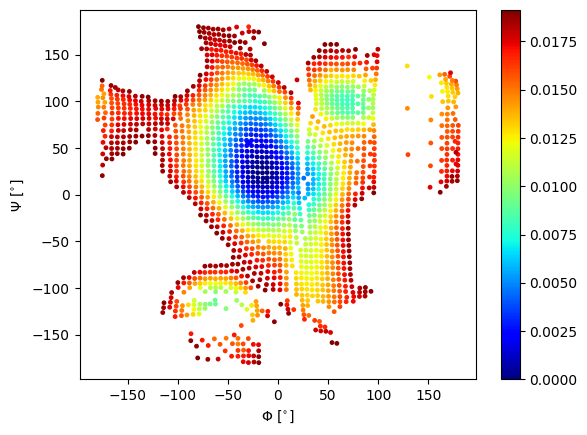

In [923]:

s = plt.scatter((df_pbe0["phi"] % 360) - 180 , (df_pbe0["psi"] % 360) - 180, c=df_pbe0[dE_key], 
                # vmin=1.7417, vmax=1.77549, 
                s=6,
                cmap="jet")#cm.coolwarm_r)
plt.colorbar(s)
plt.xlabel("$\Phi$ [$^{\circ}$]")
plt.ylabel("$\Psi$ [$^{\circ}$]")
plt.savefig("phi_vs_psi_coloredbyPBE0MP2Diff.png")


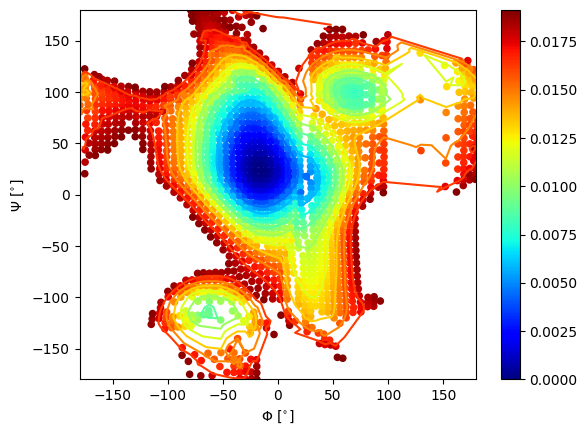

In [924]:
plt.tricontour((df_pbe0["phi"] % 360) - 180 , 
                   (df_pbe0["psi"] % 360) - 180, 
                   df_pbe0[dE_key]*627.509, 
                   levels=14,
                cmap="jet")

s = plt.scatter((df_pbe0["phi"] % 360) - 180 , (df_pbe0["psi"] % 360) - 180, c=df_pbe0[dE_key], 
                # vmin=1.7417, vmax=1.77549, 
                s=20,
                cmap="jet")

plt.colorbar(s)
plt.xlabel("$\Phi$ [$^{\circ}$]")
plt.ylabel("$\Psi$ [$^{\circ}$]")
plt.savefig("phi_vs_psi_coloredbyPBE0MP2Diff.png")

In [925]:
tmp_df = df_pbe0#.filter((pl.col("MP2Diff") < 1.757) & (1.748 < pl.col("MP2Diff")) & (pl.col("phi") > 274) & (pl.col("phi") < 300) & (pl.col("psi") > 150) )

In [926]:
tmp_df["key"][1]

'dih2dscan-1784.inp.xyz.c009f457-e492-11ef-8425-5379090b8da'

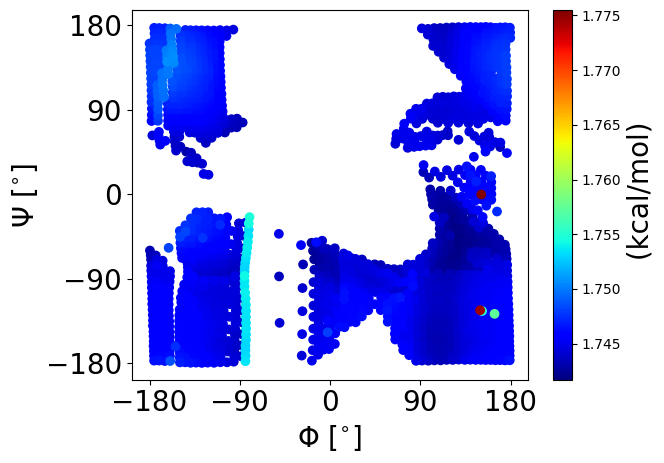

In [947]:
phis = []
psis = []


for phi in tmp_df["phi"]:
    if 0 < phi < 180:
        pass
    else:
        phi = phi - 360
    phis.append(phi)


for psi in tmp_df["psi"]:
    if 0 < psi < 180:
        pass
    else:
        psi = psi - 360
    psis.append(psi)


s = plt.scatter((phis), (psis), c=tmp_df["MP2Diff"], 
                vmin=1.7417, vmax=1.77549,
                cmap= "jet") #"jet")#cm.coolwarm_r)

plt.xlabel("$\Phi$ [$^{\circ}$]", fontsize=20)
plt.ylabel("$\Psi$ [$^{\circ}$]", fontsize=20)
plt.xticks(np.arange(-180, 181, 90), fontsize=20)
plt.yticks(np.arange(-180, 181, 90), fontsize=20)
cbar = plt.colorbar(s)
cbar.set_label(" (kcal/mol)", fontsize=20)
#cbar.set_ticklabels(fontsize=14)
#cbar.set_ticklabels(["{:.1f}".format(_) for _ in np.arange(1.7417, 1.77549, 0.001)], fontsize=14)

plt.savefig("RamPlotSeePBE0Outliers.png")





# s = plt.scatter((tmp_df["phi"] ) , (tmp_df["psi"]), c=tmp_df["MP2Diff"], 
#                 vmin=1.7417, vmax=1.77549,
#                 cmap="jet")#cm.coolwarm_r)
# plt.colorbar(s)




In [716]:

def recover_GRADNORM_from_malformed_json(output_path, natoms=42):
    """Unofficial implementation of the 'find out' function
    ('fuck around' function not yet public)"""

    with open(output_path) as f:
        output_str = f.read()

    no_ws = output_str.replace(" ", "")
    no_ws = no_ws.replace("\n", "")
    no_ws_reversed = no_ws[::-1]

    if not "MRONDARG" in no_ws_reversed:
        return None

    darg_idx = no_ws_reversed.index("MRONDARG")
    darg_hit_prefix = no_ws_reversed[0:darg_idx:1][::-1]
    close_bracket_idx = darg_hit_prefix.index(",")

    txt_array = darg_hit_prefix[2:close_bracket_idx]
    txt_array = txt_array.replace("[", " ")
    txt_array = txt_array.replace("]", " ")

    from io import StringIO

    s = StringIO(txt_array)
    data = np.genfromtxt(s, delimiter=",")
    return data

"""
creates df holding the Gradnorm instead of the energy (NRG)
"""

def get_df_g(path):
    atoms = ase.io.read(path, index=":")
    energies = [filter_non_digits(_.info["Gradnorm"]) for _ in atoms]
    phis = [_.get_dihedral(31, 17, 14, 12, mic=False) for _ in atoms]
    psis = [_.get_dihedral(17, 14, 12, 7, mic=False) for _ in atoms] 
    keys = [[_[:-1].split("/")[9] for _ in list(_.info.keys()) if "json" in _].pop() for _ in atoms]
    _ = pl.DataFrame({"key": keys, "Gradnorm": energies, "phi": phis, "psi": psis})
    return _.with_columns((pl.col("Gradnorm") - pl.col("Gradnorm").min()).alias("deltaG"))


"""
creates df holding both Gradnorm and energy (NRG)
"""


def get_df_gNRG(path):
    atoms = ase.io.read(path, index=":")
    gradnorms = [filter_non_digits(_.info["Gradnorm"]) for _ in atoms]
    energies = [filter_non_digits(_.info["Energy"]) for _ in atoms]
    # print(f"energies: {energies}")
    # print(f"gradnorms: {gradnorms}")
    phis = [_.get_dihedral(31, 17, 14, 12, mic=False) for _ in atoms]
    psis = [_.get_dihedral(17, 14, 12, 7, mic=False) for _ in atoms] 
    keys = [[_[:-1].split("/")[9] for _ in list(_.info.keys()) if "json" in _].pop() for _ in atoms]
    _ = pl.DataFrame({"key": keys, "Gradnorm": gradnorms, "Energy": energies, "phi": phis, "psi": psis})
    return _.with_columns(
        (pl.col("Gradnorm") - pl.col("Gradnorm").min()).alias("deltaG"),
        (pl.col("Energy") - pl.col("Energy").min()).alias("deltaE")
    )

In [676]:
"""
print gradnorm into combined file
"""


method="pbe0"

with open(f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/gradnormNRG_{method}_output.xyz", "w") as t:
    
    for index in indexes4:
        i = int(index)
        file_path = Path(f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/orca/dih2dscan-{i}.inp.xyz/pbe0/def2svp") 
        fn = list(file_path.glob("*.property.json"))[0]
        #print(i, fn)
        opath = str(fn)
        
        # fn = f"dih2dscan-{i}.inp.xyz.bf418b92-e492-11ef-8425-5379090b8daf.property.json"
        energy = recover_NRG_from_malformed_json(fn)
        #xyzs = recover_Cartesians_from_malformed_json(fn)
        #print(xyzs)
        xyzs = np.zeros((42,3))
        gradnorm = recover_GRADNORM_from_malformed_json(fn)
        t.write("42\n") #number of atoms in ALA
        t.write(f"Output from {opath}, Gradnorm = {gradnorm}, Energy = {energy}\n")                                    #Energy (Hartree) = {energy}\n")
        for c in range(len(xyz)):
            for c2 in range(len(xyz[c])):
                t.write(f"{str(xyz[c][c2])}     ")
            t.write("\n")

print("done")

done


In [915]:
pbe0g_path = "/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/gradnorm_pbe0_output.xyz"
pbe0gNRG_path = "/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/gradnormNRG_pbe0_output.xyz"
df_pbe0g = get_df_g(pbe0g_path)
df_pbe0g = df_pbe0g.sort(pl.col("deltaG"))
df_pbe0gNRG = get_df_gNRG(pbe0gNRG_path)
df_pbe0gNRG = df_pbe0gNRG.sort(pl.col("Energy"))
#df_pbe0gNRG
df_mp2

key,E,phi,psi,$\Delta E$
str,f64,f64,f64,f64
"""dih2dscan-0.inp.xyz""",-932.839098,169.225097,197.912638,0.000655
"""dih2dscan-1.inp.xyz""",-932.839753,164.560371,203.420379,0.0
"""dih2dscan-2.inp.xyz""",-932.839434,169.225093,203.677148,0.000319
"""dih2dscan-3.inp.xyz""",-932.838911,174.103115,198.395466,0.000843
"""dih2dscan-4.inp.xyz""",-932.838075,178.794466,198.174302,0.001678
…,…,…,…,…
"""dih2dscan-3595.inp.xyz""",-932.838228,155.228796,188.512669,0.001525
"""dih2dscan-3596.inp.xyz""",-932.838413,160.116597,188.714882,0.00134
"""dih2dscan-3597.inp.xyz""",-932.838947,155.22747,193.61298,0.000806


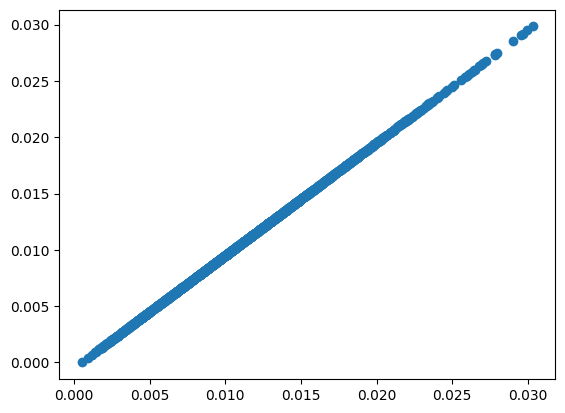

In [671]:
plt.scatter(df_pbe0g["Gradnorm"], df_pbe0g["deltaG"])

In [ ]:
plt.scatter(df_pbe0g["Gradnorm"], df_pbe0g["deltaG"])

In [ ]:
#Largest Gradnorms are 0.0298 which does not seem very large...

In [665]:
for i in df_pbe0g.iter_rows():
    print(i)

('dih2dscan-1.inp.xyz', 0.0004991234066214214, 165.07958549765465, 197.83683146190296, 0.0)
('dih2dscan-351.inp.xyz', 0.0008972571038639264, 165.07958549765465, 197.83683146190296, 0.000398133697242505)
('dih2dscan-1850.inp.xyz', 0.0011802889091346203, 165.07958549765465, 197.83683146190296, 0.0006811655025131989)
('dih2dscan-1860.inp.xyz', 0.0014072676299391566, 165.07958549765465, 197.83683146190296, 0.0009081442233177352)
('dih2dscan-3249.inp.xyz', 0.0014609132674656851, 165.07958549765465, 197.83683146190296, 0.0009617898608442637)
('dih2dscan-251.inp.xyz', 0.001590380945328397, 165.07958549765465, 197.83683146190296, 0.0010912575387069755)
('dih2dscan-3127.inp.xyz', 0.0016618792626600792, 165.07958549765465, 197.83683146190296, 0.0011627558560386578)
('dih2dscan-1247.inp.xyz', 0.0016690417693321878, 165.07958549765465, 197.83683146190296, 0.0011699183627107664)
('dih2dscan-375.inp.xyz', 0.0017851830891119776, 165.07958549765465, 197.83683146190296, 0.0012860596824905562)
('dih2dsc

In [748]:
df_pbe0gNRG

key,Gradnorm,Energy,phi,psi,deltaG,deltaE
str,f64,f64,f64,f64,f64,f64
"""dih2dscan-0.inp.xyz""",0.002556,-934.584739,165.079585,197.836831,0.002057,0.000226
"""dih2dscan-1.inp.xyz""",0.000499,-934.584965,165.079585,197.836831,0.0,0.0
"""dih2dscan-2.inp.xyz""",0.002862,-934.584836,165.079585,197.836831,0.002363,0.000129
"""dih2dscan-3.inp.xyz""",0.004546,-934.584412,165.079585,197.836831,0.004047,0.000554
"""dih2dscan-4.inp.xyz""",0.006435,-934.583869,165.079585,197.836831,0.005936,0.001096
…,…,…,…,…,…,…
"""dih2dscan-3595.inp.xyz""",0.010534,-934.583553,165.079585,197.836831,0.010035,0.001412
"""dih2dscan-3596.inp.xyz""",0.008096,-934.583972,165.079585,197.836831,0.007597,0.000993
"""dih2dscan-3597.inp.xyz""",0.008159,-934.584103,165.079585,197.836831,0.00766,0.000862


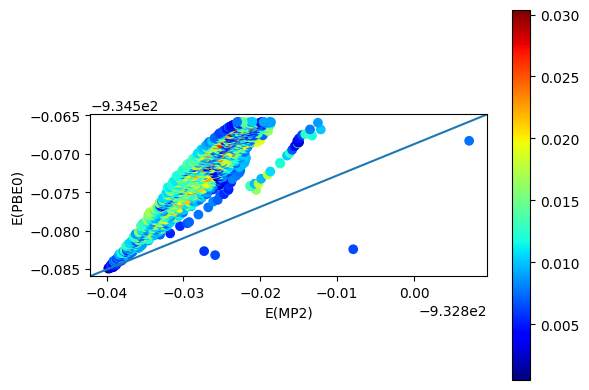

In [1002]:
"""
plot of deltaE(PBE0) vs deltaE(MP2) colored by gradnorm, using "new" dataframe which holds both Gradnorm and Energy. 
"""
df_pbe0gNRG = df_pbe0gNRG.with_columns(pl.Series(name="order", values=list(range(len(df_pbe0gNRG)))))


df_comb = df_pbe0gNRG.join(df_mp2, on="key")
df_comb = df_comb.sort("deltaE")

df_comb = df_comb.with_columns((pl.col("E") - pl.col("Energy")).alias("Edif"))
df_comb = df_comb.with_columns((pl.col("deltaE") - pl.col(dE_key)).alias("E_rel_dif"))

s = plt.scatter(df_comb["E"], df_comb["Energy"], c=df_comb["Gradnorm"], vmin=0.000499, vmax=0.030333, cmap="jet") #blue = low, red = high
plt.colorbar(s)
ax=plt.gca()
ax.set_aspect("equal")
# ax.set_xlim(-934.584965, -934.)
# ax.set_ylim(-934.584965, -934.)
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
ax.set_xlabel("E(MP2)")
ax.set_ylabel("E(PBE0)")
plt.savefig("E(PBE0)vsE(MP2colored_by_gradnorm.png")
plt.show()



# df_pbe0gNRG.with_columns(pl.col(""))

In [1015]:
df_comb = df_comb.filter((pl.col("E_rel_dif") < 0.005) & (pl.col("E_rel_dif") > -0.005))

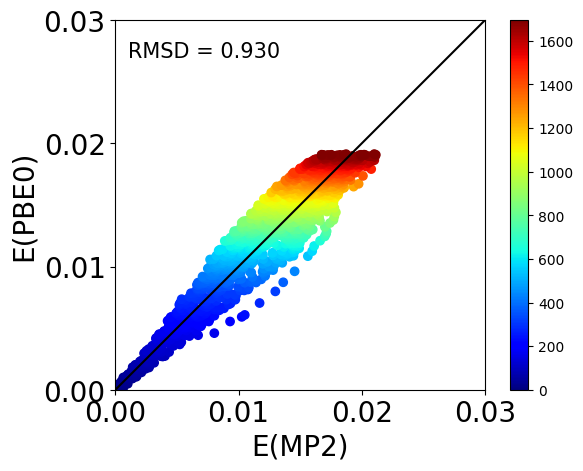

In [1032]:

s = plt.scatter(df_comb[dE_key], df_comb["deltaE"], c=df_comb["order"], cmap="jet") #blue = low, red = high
plt.colorbar(s)
ax=plt.gca()
ax.set_aspect("equal")
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="k")
ax.set_xlim(0, .03)
ax.set_ylim(0, .03)
ax = plt.gca()
plt.text(0.001, 0.027, "RMSD = 0.930", fontsize=15)
ax.set_xlabel("E(MP2)", fontsize=20)
ax.set_ylabel("E(PBE0)", fontsize=20)
plt.xticks(np.arange(0, 0.04, 0.01), fontsize=20)
plt.yticks(np.arange(0, 0.04, 0.01), fontsize=20)
plt.savefig("E(PBE0)vsE(MP2)colored_by_orderCleaned.png", bbox_inches="tight")
plt.show()


In [1017]:
rmsd(df_comb["deltaE"], df_comb[dE_key])*627.509

np.float64(0.9298974752189179)

In [1038]:
df_comb.sort("E_rel_dif")
df_comb

key,Gradnorm,Energy,phi,psi,deltaG,deltaE,order,E,phi_right,psi_right,$\Delta E$,Edif,E_rel_dif
str,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64
"""dih2dscan-1.inp.xyz""",0.000499,-934.584965,165.079585,197.836831,0.0,0.0,0,-932.839753,164.560371,203.420379,0.0,1.745212,0.0
"""dih2dscan-7.inp.xyz""",0.002127,-934.584868,165.079585,197.836831,0.001628,0.000097,1,-932.839639,164.459918,209.150281,0.000114,1.745229,-0.000017
"""dih2dscan-1350.inp.xyz""",0.002556,-934.584863,165.079585,197.836831,0.002057,0.000102,2,-932.839744,159.772814,203.586378,0.000009,1.745119,0.000093
"""dih2dscan-3599.inp.xyz""",0.002044,-934.584849,165.079585,197.836831,0.001545,0.000116,3,-932.839479,165.079585,197.836831,0.000274,1.74537,-0.000158
"""dih2dscan-2.inp.xyz""",0.002862,-934.584836,165.079585,197.836831,0.002363,0.000129,4,-932.839434,169.225093,203.677148,0.000319,1.745402,-0.00019
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""dih2dscan-1072.inp.xyz""",0.004722,-934.565894,165.079585,197.836831,0.004223,0.019071,1691,-932.819822,25.592906,223.447414,0.019931,1.746073,-0.000861
"""dih2dscan-1826.inp.xyz""",0.007713,-934.565889,165.079585,197.836831,0.007214,0.019076,1692,-932.823018,102.555167,348.846501,0.016735,1.742871,0.002341
"""dih2dscan-647.inp.xyz""",0.009011,-934.565884,165.079585,197.836831,0.008512,0.019081,1693,-932.819566,160.806549,354.038382,0.020188,1.746319,-0.001107


In [1066]:
pl.Config.set_fmt_table_cell_list_len(20)
df_comb.sort("Edif")[-20:,:]
df_tmp = df_comb #.filter((pl.col("psi_right") - 360) > 175 & (pl.col("psi_right") - 360) < 185)

phis = []
psis = []


for phi in df_comb["phi_right"]:
    if 0 < phi < 180:
        pass
    else:
        phi = phi - 360
    phis.append(phi)


for psi in df_comb["psi_right"]:
    if 0 < psi < 180:
        pass
    else:
        psi = psi - 360
    psis.append(psi)


df_tmp = df_tmp.with_columns(pl.Series(name="real_phis", values=phis))
df_tmp = df_tmp.with_columns(pl.Series(name="real_psis", values=psis))

df_tmp2 = df_tmp.drop("Gradnorm", "Energy", "phi", "psi", "deltaG", "deltaE", "E", "phi_right", "psi_right", "Edif", dE_key, "E_rel_dif")
df_tmp2

df_tmp2 = df_tmp2.sort("real_phis", "real_psis")
df_tmp2

for i in df_tmp2.iter_rows():
    print(f"{i}\n")



#df_tmp2.filter(pl.col(int("real_phis") > 175) & pl.col(int("real_phis") < 185) & pl.col(int("real_psis") > 175) & pl.col(int("real_psis") < 185))

('dih2dscan-2470.inp.xyz', 286, -179.9804702830077, 160.75839674769577)

('dih2dscan-2468.inp.xyz', 372, -179.62022817007318, 154.1903327671837)

('dih2dscan-535.inp.xyz', 1469, -179.60206941460316, -60.01109293693446)

('dih2dscan-2446.inp.xyz', 460, -179.36218957205242, 148.08584279223697)

('dih2dscan-2444.inp.xyz', 554, -179.12683350847036, 141.9773755295348)

('dih2dscan-2438.inp.xyz', 647, -178.91130784865194, 135.79414511508594)

('dih2dscan-529.inp.xyz', 1221, -178.84080916903005, -64.97141895500783)

('dih2dscan-2436.inp.xyz', 766, -178.71434940035786, 129.541911277957)

('dih2dscan-527.inp.xyz', 1040, -178.47773962796865, -69.64721035152519)

('dih2dscan-185.inp.xyz', 706, -178.4674881395968, -76.14543360892543)

('dih2dscan-2094.inp.xyz', 865, -178.43957443013554, 123.3642871142972)

('dih2dscan-183.inp.xyz', 589, -178.29764063231968, -81.44817914145335)

('dih2dscan-2092.inp.xyz', 969, -178.26349931703965, 117.204134602789)

('dih2dscan-2086.inp.xyz', 1059, -178.05827512143

In [1068]:
#(lambda x: x.split("-")[0])(df_comb["key"])

df_tmp2.filter(pl.col("order") == 419)

key,order,real_phis,real_psis
str,i64,f64,f64
"""dih2dscan-3110.inp.xyz""",419,112.296274,63.030421


In [845]:
z_ord = df_comb.with_columns((pl.col("key")).map_elements(lambda x: int(x.split("-")[1].strip(".inp.xyz"))).alias("z"))

/tmp/ipykernel_4082210/2373274420.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  z_ord = df_comb.with_columns((pl.col("key")).map_elements(lambda x: int(x.split("-")[1].strip(".inp.xyz"))).alias("z"))


In [848]:
z_ord = z_ord.sort("z")

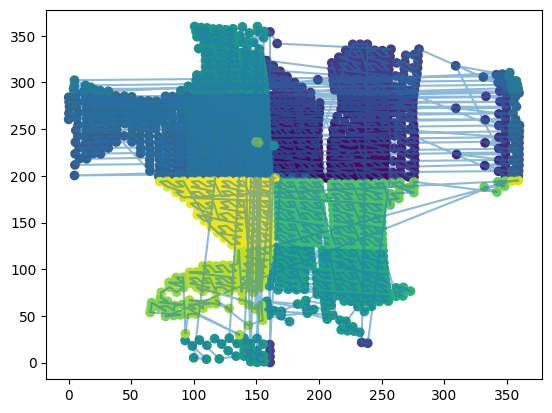

In [858]:
plt.plot(z_ord["phi_right"], z_ord["psi_right"], linestyle="-", alpha=0.5)
plt.scatter(z_ord["phi_right"], z_ord["psi_right"], c=z_ord["z"])
# plt.scatter(z_ord["phi_right"], z_ord["psi_right"], c=z_ord["E_rel_dif"])

In [827]:
tmp_df = df_comb.filter((pl.col("Edif") < 1.757) & (1.748 < pl.col("Edif")) & (pl.col("phi_right") > 274) & (pl.col("phi_right") < 300) & (pl.col("phi_right") > 150) )

In [835]:
tmp_df.sort("order")[:10]

key,Gradnorm,Energy,phi,psi,deltaG,deltaE,order,E,phi_right,psi_right,$\Delta E$,Edif,E_rel_dif
str,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64
"""dih2dscan-260.inp.xyz""",0.004894,-934.568018,165.079585,197.836831,0.004395,0.016947,259,-932.814964,275.661426,198.632667,0.024789,1.753053,-0.007842
"""dih2dscan-262.inp.xyz""",0.003215,-934.56833,165.079585,197.836831,0.002716,0.016635,260,-932.815181,276.059654,204.602884,0.024572,1.753149,-0.007937
"""dih2dscan-268.inp.xyz""",0.002698,-934.56846,165.079585,197.836831,0.002199,0.016505,265,-932.815132,276.202647,210.617477,0.024621,1.753328,-0.008116
"""dih2dscan-270.inp.xyz""",0.002228,-934.568502,165.079585,197.836831,0.001728,0.016463,266,-932.814953,276.26256,216.706125,0.0248,1.753549,-0.008337
"""dih2dscan-292.inp.xyz""",0.002194,-934.568563,165.079585,197.836831,0.001695,0.016402,271,-932.815057,276.171524,222.764397,0.024696,1.753506,-0.008294
"""dih2dscan-294.inp.xyz""",0.002801,-934.568707,165.079585,197.836831,0.002302,0.016258,272,-932.815233,276.114003,229.259092,0.02452,1.753475,-0.008263
"""dih2dscan-300.inp.xyz""",0.004548,-934.569015,165.079585,197.836831,0.004048,0.01595,277,-932.815514,276.1872,235.719212,0.024239,1.753501,-0.008289
"""dih2dscan-302.inp.xyz""",0.006749,-934.569503,165.079585,197.836831,0.00625,0.015462,278,-932.815854,276.062247,242.062389,0.023899,1.75365,-0.008438
"""dih2dscan-388.inp.xyz""",0.010255,-934.570252,165.079585,197.836831,0.009756,0.014713,299,-932.816525,275.802748,248.666345,0.023228,1.753727,-0.008515


In [914]:
(242) - 360

-118

In [859]:
df_comb.filter((pl.col("order") > 258) & (pl.col("order") < 280)).sort("order")[-10:]

key,Gradnorm,Energy,phi,psi,deltaG,deltaE,order,E,phi_right,psi_right,$\Delta E$,Edif,E_rel_dif
str,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64
"""dih2dscan-291.inp.xyz""",0.003414,-934.568731,165.079585,197.836831,0.002915,0.016234,270,-932.824707,272.167504,223.426653,0.015046,1.744023,0.001188
"""dih2dscan-292.inp.xyz""",0.002194,-934.568563,165.079585,197.836831,0.001695,0.016402,271,-932.815057,276.171524,222.764397,0.024696,1.753506,-0.008294
"""dih2dscan-294.inp.xyz""",0.002801,-934.568707,165.079585,197.836831,0.002302,0.016258,272,-932.815233,276.114003,229.259092,0.02452,1.753475,-0.008263
"""dih2dscan-296.inp.xyz""",0.005992,-934.56964,165.079585,197.836831,0.005493,0.015325,273,-932.825399,265.969731,235.929226,0.014354,1.744242,0.00097
"""dih2dscan-297.inp.xyz""",0.007725,-934.570662,165.079585,197.836831,0.007226,0.014303,274,-932.826137,260.108228,242.765998,0.013616,1.744525,0.000687
"""dih2dscan-298.inp.xyz""",0.008304,-934.570282,165.079585,197.836831,0.007805,0.014683,275,-932.825986,265.93672,242.605861,0.013767,1.744296,0.000916
"""dih2dscan-299.inp.xyz""",0.005572,-934.569266,165.079585,197.836831,0.005073,0.015699,276,-932.825019,272.014111,236.283788,0.014735,1.744248,0.000964
"""dih2dscan-300.inp.xyz""",0.004548,-934.569015,165.079585,197.836831,0.004048,0.01595,277,-932.815514,276.1872,235.719212,0.024239,1.753501,-0.008289
"""dih2dscan-302.inp.xyz""",0.006749,-934.569503,165.079585,197.836831,0.00625,0.015462,278,-932.815854,276.062247,242.062389,0.023899,1.75365,-0.008438


Text(0, 0.5, '$\\Psi$ [$^{\\circ}$]')

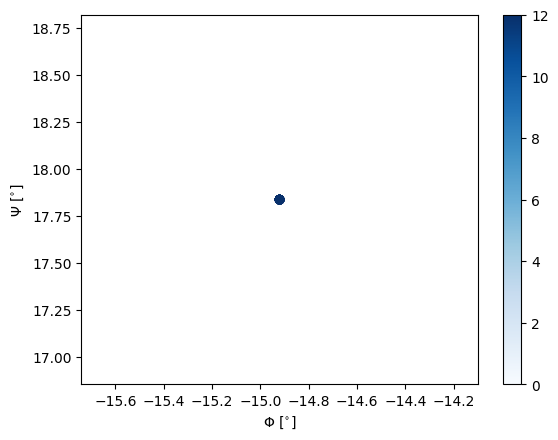

In [833]:
# for k in ["phi_right", "psi_right", "deltaG"]:
#     s = plt.scatter(tmp_df["order"], tmp_df["E_rel_dif"], c=tmp_df[k])
#     plt.colorbar(s)
#     plt.title(k)
#     plt.show()

s = plt.scatter((tmp_df["phi"] % 360) - 180 , (tmp_df["psi"] % 360) - 180, c=tmp_df["order"], vmin=0, vmax=VMAX, cmap="Blues")#cm.coolwarm_r)
plt.colorbar(s)
plt.xlabel("$\Phi$ [$^{\circ}$]")
plt.ylabel("$\Psi$ [$^{\circ}$]")
# plt.xlim(-180, 180)
# plt.ylim(-180, 180)


In [745]:
df_comb.describe()

statistic,key,Gradnorm,Energy,phi,psi,deltaG,deltaE,E,phi_right,psi_right,$\Delta E$,Edif
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""1696""",1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,0.01146,-934.572421,165.079585,197.836831,0.010961,0.012544,-932.827179,171.503846,207.033463,0.012574,1.745241
"""std""",null,0.005296,0.004939,0.0,2.8430e-14,0.005296,0.004939,0.005173,75.070213,82.488897,0.005173,0.002126
"""min""","""dih2dscan-0.inp.xyz""",0.000499,-934.584965,165.079585,197.836831,0.0,0.0,-932.839753,0.111514,0.178664,0.0,1.741778
"""25%""",null,0.007576,-934.575505,165.079585,197.836831,0.007077,0.00946,-932.830673,120.947622,148.356971,0.00908,1.744151
"""50%""",null,0.011058,-934.571434,165.079585,197.836831,0.010559,0.013532,-932.826248,166.865826,219.605674,0.013505,1.744971
"""75%""",null,0.014704,-934.568302,165.079585,197.836831,0.014205,0.016663,-932.823337,226.216543,272.737729,0.016416,1.745968
"""max""","""dih2dscan-99.inp.xyz""",0.030333,-934.565839,165.079585,197.836831,0.029834,0.019127,-932.79283,359.957999,359.865664,0.046923,1.775497


In [608]:
opaths = []
method = "pbe0"
for index in indexes4:
    opaths.append(glob(f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_frz/orca/dih2dscan-{i}.inp.xyz/{method}/def2svp/*.json")[0])

def calculate_dih_and_energies():
    gnorms, energies = [], []
    all_atoms = []
    phis, psis = [], []
    names = []
    
    for i in range(3600):
        fn = f"/cluster/home/schmidtn/master/wahlprak/dft-mp2-data/orca_dih_mp2_rimp2/orca/dih2dscan-{i}.inp.xyz/mp2/def2svp/dih_scani.xyz"
        
        names.append(i)
        
        with open(
            fn,
            "r"
        ) as f:
            _, _, _, _, _, energy = f.read().split("\n")[1].split()
            energies.append(float(energy))
    
        atoms = io.read(fn)
        
        phi, psi = (
            atoms.get_dihedral(31, 17, 14, 12, mic=False), # % 180 - 180,
            atoms.get_dihedral(17, 14, 12, 7, mic=False), # % 180 - 180,
        )
    
        if 0 > phi > 180:
            pass
        else:
            phi = phi - 360
    
        if 0 > psi > 180:
            pass
        else:
            psi = psi - 360
        
        all_atoms.append(atoms)
        phis.append(phi)
        psis.append(psi)
    
    #gnorms = np.array(gnorms)
    # _ = plt.hist(gnorms, bins=100)

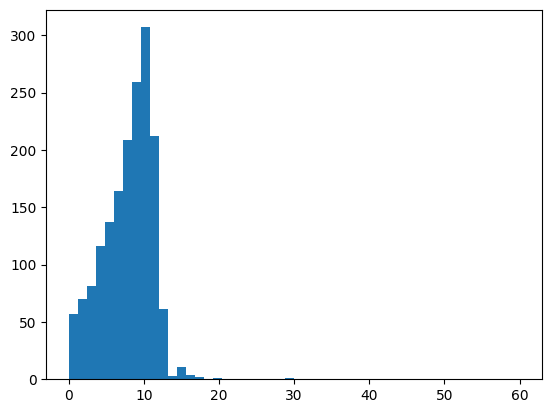

In [609]:
energies = np.array(energies)

energies_min_shift = energies - min(energies)

_ = plt.hist(energies_min_shift * 627, bins=50, range=(0, 60))
plt.show()

In [610]:
import polars as pl
VMAX = 12
df = pl.DataFrame({"name": keys, "energies_min_shift": energies_min_shift * 627, "psi": np.array(phis), "phi": np.array(psis)})
df = df.filter(pl.col("energies_min_shift") < VMAX)

Text(0, 0.5, '$\\Psi$ [$^{\\circ}$]')

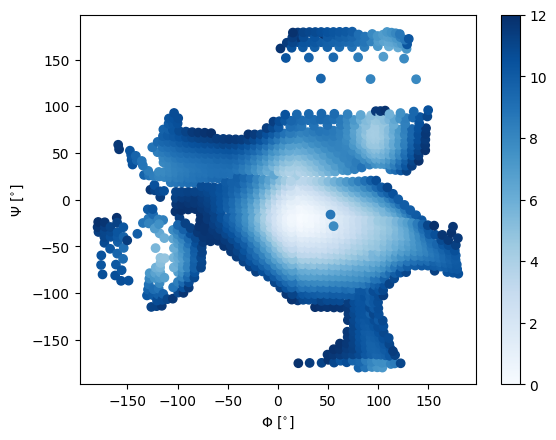

In [771]:
s = plt.scatter((df["phi"] % 360) - 180 , (df["psi"] % 360) - 180, c=df["energies_min_shift"], vmin=0, vmax=VMAX, cmap="Blues")#cm.coolwarm_r)
plt.colorbar(s)
plt.xlabel("$\Phi$ [$^{\circ}$]")
plt.ylabel("$\Psi$ [$^{\circ}$]")
# plt.xlim(-180, 180)
# plt.ylim(-180, 180)

In [ ]:
s = plt.scatter((df["phi"] % 360) - 180 , (df["psi"] % 360) - 180, c=df["energies_min_shift"], vmin=0, vmax=VMAX, cmap="Blues")#cm.coolwarm_r)
plt.colorbar(s)

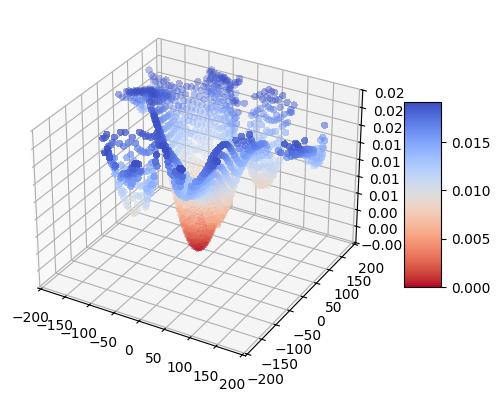

In [872]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y, Z =  (df_pbe0["phi"] % 360) - 180 , (df_pbe0["psi"] % 360) - 180, df_pbe0[dE_key]
# X, Y, Z = df["phi"], df["psi"], df["energies_min_shift"]
# Plot the surface.
surf = ax.scatter(X, Y, Z, cmap=cm.coolwarm_r, c=Z,
                       linewidth=0, antialiased=False,
                  # vmin=0, vmax=VMAX
                 )

# Customize the z axis.
# ax.set_zlim(-1.01, VMAX)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

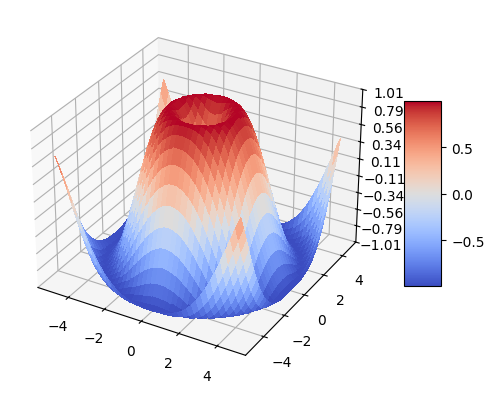

In [119]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [213]:
ndf = df.sort("energies_min_shift")
ndf


name,energies_min_shift,psi,phi
i64,f64,f64,f64
1,0.0,-195.439636,-156.579623
7,0.060712,-195.540076,-150.849716
1350,0.06419,-200.227193,-156.413624
3599,0.072916,-194.920409,-162.163167
2,0.081081,-190.774902,-156.322849
…,…,…,…
1072,11.95727,-334.407089,-136.552582
1826,11.960609,-257.444829,-11.153495
647,11.963748,-199.193449,-5.961614


In [215]:
indexes = []
for i in ndf["name"]:
    indexes.append(i)

len(indexes)

1696

In [218]:

for index in indexes:
    opath = f"/cluster/home/schmidtn/master/wahlprak/dftmp2bench/data/xyzs/dih2dscan-{index}.inp.xyz"
    gpath = f"/cluster/home/schmidtn/master/wahlprak/dftmp2bench/data/xyzs2/dih2dscan-{index}.inp.xyz"
    
    with open(opath, "r") as f:
        content = f.read()
    with open(gpath, "w") as t:    
        t.write(content)